# Final Report Goup 8

## Statistically Inferring the Difference in Proportions of Break and Enter Type Crimes Between Shaughnessy and Oakridge

#### Introduction

Over the last 20 years, the population of Vancouver has dramatically increased, and in accordance, the number of crimes within city neighborhoods has increased as well. In this project, an analysis of the proportion of types of crimes between two neighborhoods was conducted to find if there was a statistically significant difference. According to a study conducted at Simon Fraser University, post-pandemic reports by the Vancouver Police Department (VPD) saw an increase in crimes in poorer areas while richer areas either remained the same or witnessed a small increase in theft-related crimes. In addition to this study, another poll conducted in June 2022 reported that 3 in 5 British Columbians say crime is rising and public safety is decreasing. These research papers identified an interest for our group to investigate how the proportion of crimes varies among two neighborhoods, considering there is pre-existing research on these topics. In addition, if we find a statistically significant difference between these two neighborhoods, we are curious to see if they agree with the literature on this topic. 

Note that the estimator used in this project is a difference in proportions calculated from a data set containing the types of crime occuring in various neighbourhoods throughout Vancouver. In this case, a scale parameter (i.e. standard deviation, inter-quartile range, etc.) cannot be hypothesized because the raw data is not composed of numerical values. 

#### Preliminary Results

In [14]:
library(datateachr)
library(infer)
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# This data frame contains crime data from the year 2022 for a multitude of different neighborboods
all_crime <- read.csv("https://github.com/nehamenon704/stat201project/raw/main/crimedata_csv_AllNeighbourhoods_2022.csv")
head(all_crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2022,1,3,16,19,10XX ALBERNI ST,West End,491036.1,5459146
2,Break and Enter Commercial,2022,6,17,5,16,10XX ALBERNI ST,West End,491067.3,5459115
3,Break and Enter Commercial,2022,3,15,5,14,10XX ALBERNI ST,West End,491102.2,5459092
4,Break and Enter Commercial,2022,3,19,6,42,10XX ALBERNI ST,West End,491102.2,5459092
5,Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
6,Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444


The full data set gets selected for neighbourhood and crime type for the year of 2022. There are two types of break and enter crimes (commercial and residential/other) that get generalized into break and enter type crimes for simplicity.

In [3]:
crime <- all_crime %>%
    select(TYPE, NEIGHBOURHOOD) 
crime$TYPE <- replace(crime$TYPE, crime$TYPE == 'Break and Enter Commercial', 'Break and Enter')
crime$TYPE <- replace(crime$TYPE, crime$TYPE == 'Break and Enter Residential/Other', 'Break and Enter')
head(crime)

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Break and Enter,West End
2,Break and Enter,West End
3,Break and Enter,West End
4,Break and Enter,West End
5,Break and Enter,Shaughnessy
6,Break and Enter,Shaughnessy


The following cell calculates the proportion of break and enters for each Vancouver Neighbourhood.  

In [4]:
prop_bne <- crime %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(n = n(), prop = sum(TYPE == 'Break and Enter') / n)  
prop_bne

NEIGHBOURHOOD,n,prop
<chr>,<int>,<dbl>
,4,0.00000000
Arbutus Ridge,349,0.15472779
Central Business District,10615,0.06773434
Dunbar-Southlands,323,0.15170279
Fairview,1676,0.11813842
Grandview-Woodland,1525,0.12459016
Hastings-Sunrise,954,0.13312369
Kensington-Cedar Cottage,1452,0.09986226
Kerrisdale,339,0.21533923


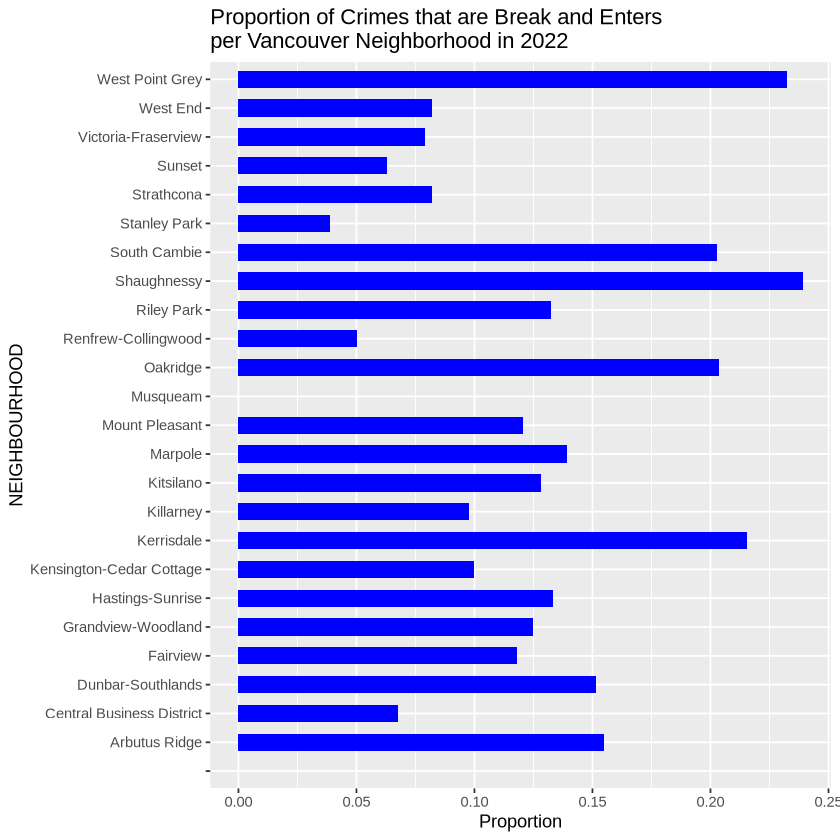

In [5]:
plot_prop_bne <- prop_bne %>%
    ggplot() +
    geom_col(aes(prop, NEIGHBOURHOOD), fill = 'blue', width = 0.6) +
    labs(x = 'Proportion', title = 'Proportion of Crimes that are Break and Enters \nper Vancouver Neighborhood in 2022') 
    fig.dim = c(8,8)
plot_prop_bne

This code cell produces a pie chart containing the proportion of all the types of crime for each Vancouver neighbourhood we are wanting to analyse. 

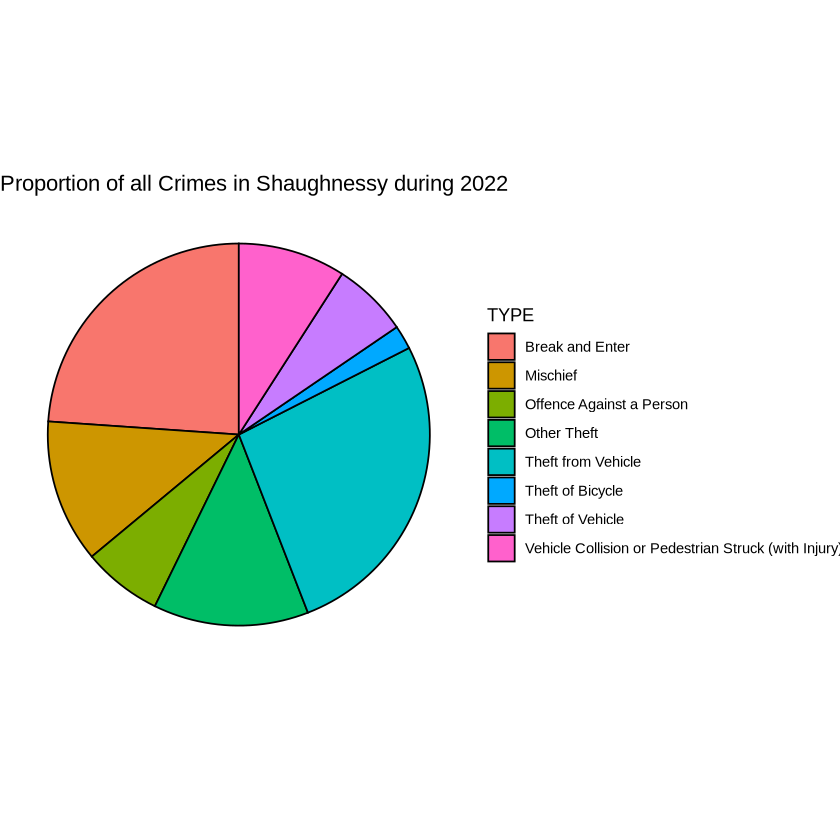

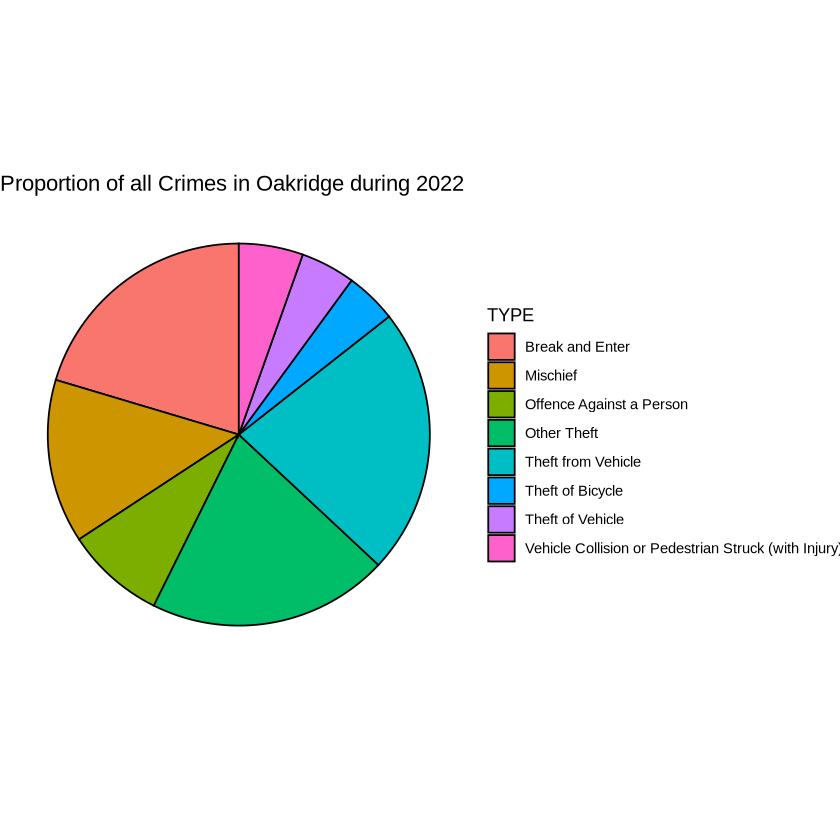

In [6]:
# total number of crimes in this neighbourhood
total_crime_shaughnessy <- crime %>%
    summarize(sum = sum(NEIGHBOURHOOD == 'Shaughnessy')) %>%
    pull()

total_crime_oakridge <- crime %>%
    summarize(sum = sum(NEIGHBOURHOOD == 'Kitsilano')) %>%
    pull()

crime_shaughnessy <- crime %>%
    filter(NEIGHBOURHOOD == 'Shaughnessy') %>%
    group_by(TYPE) %>%
    summarize(prop = n() / total_crime_shaughnessy) 

crime_oakridge <- crime %>%
    filter(NEIGHBOURHOOD == 'Oakridge') %>%
    group_by(TYPE) %>%
    summarize(prop = n() / total_crime_oakridge) 

plot_crime_type_shaughnessy <- crime_shaughnessy %>%
    ggplot(aes(x="", y=prop, fill=TYPE)) +
    geom_bar(stat="identity", width=1, color='black') +
    coord_polar("y", start=0) +
    labs(title = 'Proportion of all Crimes in Shaughnessy during 2022') +
    theme_void()

plot_crime_type_oakridge <- crime_oakridge %>%
    ggplot(aes(x="", y=prop, fill=TYPE)) +
    geom_bar(stat="identity", width=1, color='black') +
    coord_polar("y", start=0) +
    labs(title = 'Proportion of all Crimes in Oakridge during 2022') +
    theme_void()
fig.dim = c(8,8)

plot_crime_type_shaughnessy
plot_crime_type_oakridge

## Simulation Based 

The case to be considered is:

- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$

Where $p_1$ and $p_2$ are the proportions of break and enters in Shaughnessy and Oakridge respectively.

The following cell produces the silulation-based null distribution of the difference in proportion of break and enters between Shaughnessy and Oakridge by using 2000 resamples with replacement. This is aproximating what the sampling variation would be in a world where there is no difference in the proportions of break and enters between the two neighbourhoods. The vertical red line is the observed test statistic calculated from our 2022 sample. The shaded red region indicates the how often the null test was even more pronounced than the observed test statistic.

p_value
<dbl>
0.1695


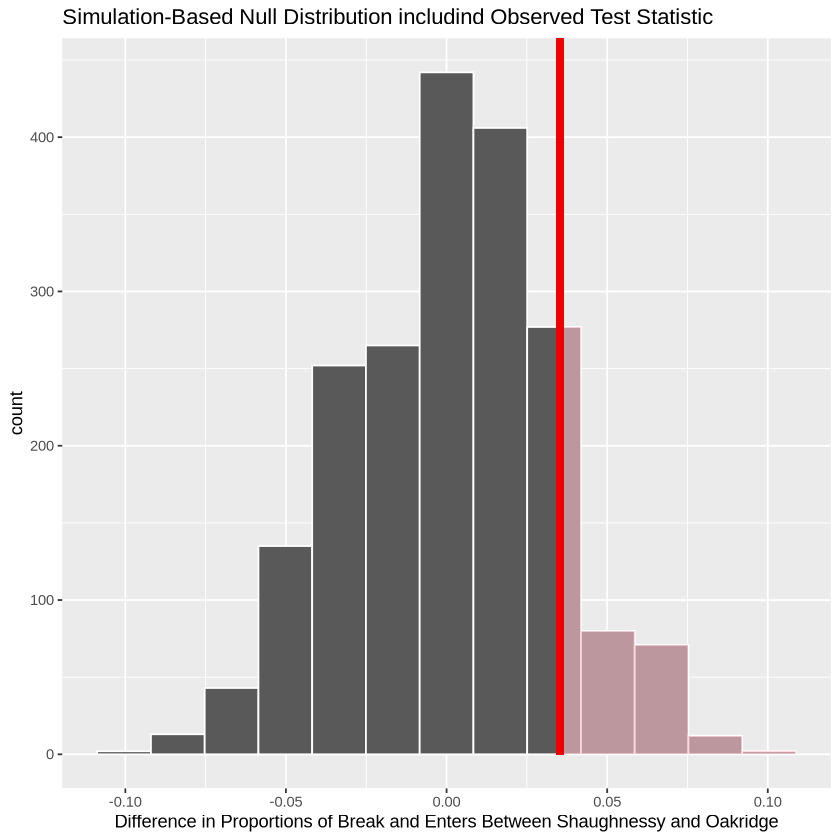

In [7]:
set.seed(222)
# Now for the actual confidence interval
crime_two_nh <- crime %>%
    filter(NEIGHBOURHOOD %in% c('Shaughnessy', 'Oakridge'))

# the infer package 'success'can only be used if the response variable only has two levels
# This line replaces all the other types of crime besides 'Break and Enter' to be 'Other Crimes'
crime_two_nh$TYPE <- replace(crime_two_nh$TYPE, crime_two_nh$TYPE != 'Break and Enter', 'Other Crimes')

# The actual observed difference in proportions of our sample
obs_diff_props <- crime_two_nh %>%
    specify(TYPE ~ NEIGHBOURHOOD, success = 'Break and Enter') %>%
    calculate(stat = 'diff in props', order = c('Shaughnessy', 'Oakridge'))

null_distribution <- crime_two_nh %>%
    specify(TYPE ~ NEIGHBOURHOOD, success = 'Break and Enter') %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 2000, type = 'permute') %>%
    calculate(stat = 'diff in props', order = c('Shaughnessy', 'Oakridge'))
        
visualize(null_distribution, bins = 13) +
    shade_p_value(obs_stat = obs_diff_props, direction = 'right') +
    labs(title = 'Simulation-Based Null Distribution including Observed Test Statistic', 
         x = 'Difference in Proportions of Break and Enters Between Shaughnessy and Oakridge')

p_value <- null_distribution %>%
    get_p_value(obs_stat = obs_diff_props, direction = 'right')
p_value

The simulation-based confidence interval is generated using 2000 resamples with replacement. A confidence interval of 95% was obtained and plotted on the histogram. Given this simulation, we are 95% confident that the true difference in proportions of break and enter crimes between Shaughnessy and Oakridge lies between the lower and upper bounds of the confidence interval.

Given this simulation, we are 95% confident that the true difference in proportions of break and enter 
crimes between Shaughnessy and Oakridge lies between  -0.027  and  0.1

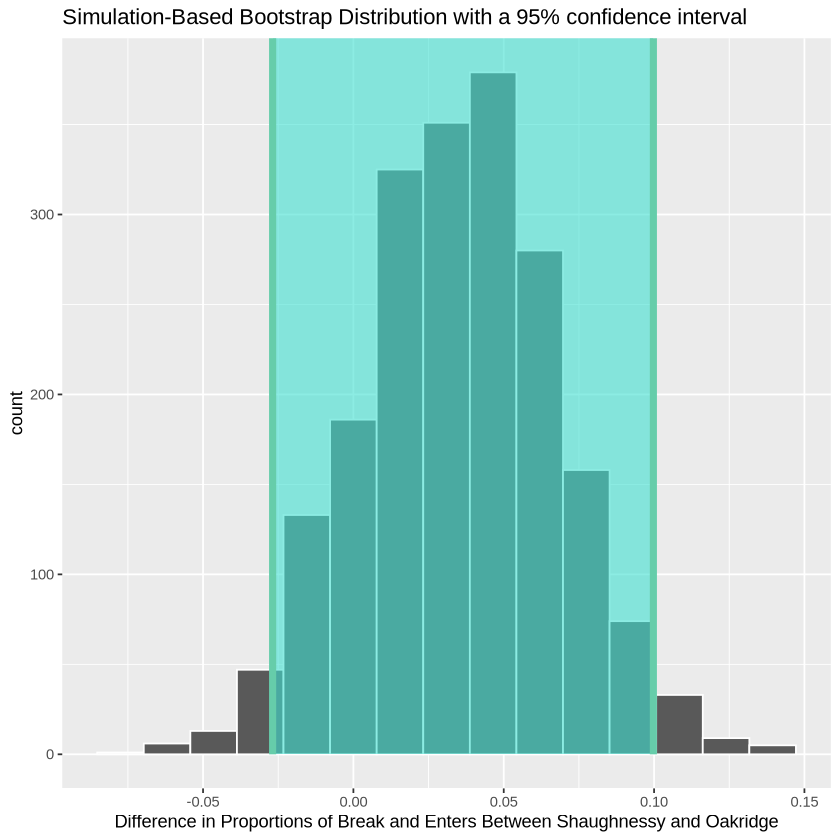

In [8]:
bootstrap_distribution <- crime_two_nh %>%
    specify(TYPE ~ NEIGHBOURHOOD, success = 'Break and Enter') %>%
    generate(reps = 2000, type = 'bootstrap') %>%
    calculate(stat = 'diff in props', order = c('Shaughnessy', 'Oakridge'))

percentile_ci <- bootstrap_distribution %>%
    get_ci(level = 0.95, type = 'percentile')

visualize(bootstrap_distribution) +
    shade_confidence_interval(endpoints = percentile_ci) +
    labs(title = 'Simulation-Based Bootstrap Distribution with a 95% confidence interval', 
         x = 'Difference in Proportions of Break and Enters Between Shaughnessy and Oakridge')

### Results of Simulation Based method
With a 5% significance level, we do not reject the null-hypothesis that the proportion of break and enters between the Shaughnessy and Oakridge neighbourhoods are any different in 2022, since our p-value is greater than 0.05.

We are 95% confident that the true difference in proportion of break and enter type crimes between the neighbourhoods of Shaughnessy and Oakridge are between the values of -0.027 and 0.1. 

## Theory Based

Once again, the case we are considering is:

- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$

In the next section, we will be producing a confidence interval by using the Central Limit Theorem. In order to use this theoretical method, several conditions need to be met by our data. The sample must be big enough, the sample must have been taken in an independent fashion, and the estimator being used needs to be a sum of random components. As indicated below, there are 665 observations in the data set; therefore, it is large enough. This data was extracted from the PRIME BC Police Records Management System (RMS), which indicates that it was likely gathered in an independent fashion. Lastly, the estimator being used is the difference in proportions, which is indeed a sum of random components.

In [9]:
cat('The number of observations in this data set is: ',nrow(crime_two_nh))

The number of observations in this data set is:  665

Since we are testing the difference in proportion between two independent populations, our test statistic is:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
where $\hat{p}_1$ and $\hat{p}_2$ are the sample proportions of break and enter type crimes in Shaughnessy and Oakridge, respectively; $n$ is the sample size; and $\hat{p}$ is the pooled proportion, given by: 

$$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$

In [10]:
summary <- crime_two_nh %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(n = n(),
              prop = mean(TYPE == 'Break and Enter'))
summary

NEIGHBOURHOOD,n,prop
<chr>,<int>,<dbl>
Oakridge,368,0.2038043
Shaughnessy,297,0.2390572


In [19]:
n1 <- summary$n[2]
n2 <- summary$n[1]
p1 <- summary$prop[2]
p2 <- summary$prop[1]

p_hat <- (n1*p1 + n2*p2) / (n1 + n2)

# Our test statistic
Z <- (p1 - p2) / sqrt(p_hat*(1 - p_hat)*(1/n1 + 1/n2))

# p-value
p <- 2*pnorm(Z, lower.tail = FALSE)
cat("the p-value is: ",p)

the p-value is:  0.274916

Instead of manually computing the theory based confidence interval and p-value, we can let R do the work for us and utilize the prop.test function.

In [16]:
prop_test <- tidy(
    prop.test(x = c(n1*p1, n2*p2),
              n = c(n1, n2),
              correct = FALSE))
prop_test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.2390572,0.2038043,1.192052,0.274916,1,-0.02836096,0.09886675,2-sample test for equality of proportions without continuity correction,two.sided


### Results of Theory Based Method
The p-value and lower and upper values for the confidence interval are nearly the same between the simulation based and theory based methods. 

We once again cannot reject the null-hypothesis that there is a statistically significant difference between the proportions of break and enters between Shaughnessy and Oakridge with a significance level of 5%. 

Based on these results, we are 95% confident that the true difference in proportions between the two neighbourhoods lies between the values of -0.0284 and 0.0989. 

#### Methods

Using the Crime Data published by the City of Vancouver, we first created a horizontal bar chart comparing the proportion of one type of crime, Break and Enters (B&Ns), in several neighbourhoods in Vancouver. The horizontal bar chart provides a clear visual of the difference in proportions between all the neighbourhoods across Vancouver. Looking at this chart, we can observe that the proportion of B&Ns in Oakridge and Shaughnessy appear slightly different from each other. However, looking at this plot alone, it is unclear whether the difference between the two neighbourhoods is statistically significant. To further our understanding of the type of crime in Shaughnessy and Oakridge, we constructed two pie charts comparing the different types of crimes in each neighbourhood and found that both neighbourhoods have a large proportion of B&Ns. Based on our preliminary analysis, we are interested in investigating the difference in proportions of one type of crime, Break and Enter, between two neighbourhoods, Oakridge and Shaughnessy. Our results can be considered trustworthy service we are using data from a reliable source, the City of Vancouver, and are not significantly altering the data. 

To determine if there is a statistically significant difference between these two groups, we have decided to perform a two-tailed hypothesis test to determine if the proportion of B&Ns in Oakridge is different from the proportion of B&Ns in Shaughnessy. We will perform our test with α = 0.05 (5% significance level) and will produce a confidence interval for the difference in proportions using the same significance level. We will employ two different methods for our hypothesis test - using bootstrapping and using the Central Limit Theorem. 

Through our analysis, we expect to find a statistically significant difference in the proportion of B&Ns in Shaughnessy and Oakridge. We expect the proportion to be higher in Shaughnessy than in Oakridge. Understanding this difference in proportion can aid the police in making choices about the allocation of resources. For example, if we observe that the proportion of B&Ns in Shaughnessy is higher, the police can choose to assign more police officers to Shaughnessy and fewer to Oakridge. Furthermore, more surveillance resources can be dispensed for this neighbourhood to ensure no breaking and entering occurs. Knowing the difference in proportions of any crime can help in policy-making and resource allocation in those neighbourhoods. Our analysis can also lead to further questions, such as:
What causes the proportion of a certain type of crime (such as B&Ns) to be higher in one neighbourhood than another?
How much has the proportion of a certain type of crime (such as B&Ns) increased in the last decade?
What structural and institutional change can be implemented to reduce crime in specific neighbourhoods?


#### References

Canseco, M. (2023, May 24). Almost three-in-five British Columbians say crime is rising. Research Co. https://researchco.ca/2023/05/24/crime-bc-3/ 

CBC/Radio Canada. (2022a, January 23). New study shows higher incidence of violent crime in poor Vancouver neighbourhoods, theft in wealthier ones | CBC news. CBCnews. https://www.cbc.ca/news/canada/british-columbia/sfu-study-vancouver-crime-impacts-1.6323902 